# Hotel Recommendations and Sentimental Analysis

## _About This Project :_
- Nowadays, there are an enormous number of hotels and rooms provide by them. Hence, we have various choices for us to pick the most suitable hotel to stay. However, despite of large number of hotels, some people still having a trouble to find the most suitable hotel for them. Therefore, to solve this type of problem, I have made a sentimental analysis and a recommender systems based on the past users reviews and ratings. 

## _Goals_ :

- Make a Sentimental Analysis based on the past reviews and ratings
    - I have separated into two groups : 'Nicely Rated Hotels' or 'Badly Rated Hotels' based on their ratings. By using the different types of classifiers( Multinomial Naive Bayes, Logistic Regressions and Support Vector Machines), I made classifier models in order to  correctly classify whether the following hotel is a 'suitable' hotel for the user.
    
- Make a Content-Based Recommender system and a Collaborative-Filtering Recommendern System by using KNearestNeighbours on USA hotels

    - I have used KNearestNeighbors to find the top 5 most similar hotels of a certain hotel. Also,by using content-based recommender system, I made a top 10 most similar hotels list of a certain hotel.

## _Data :_

- I used a dataset from Kaggle : https://www.kaggle.com/datafiniti/hotel-reviews provided by Datafiniti

- Dataset with large number of different hotels and their ratings and reviews.

#### _Attributes Informations_ :

- address : The address of the hotel
- categories : The types of hotel(Eg : Motel, Hotel, etc )
- city,country,province : which city,country and province does this hotel belongs to.
- latitude,longitude : The latitude and longitude of the hotel
- name : name of the hotel
- postalCode : postal code of the hotel
- reviews.date : Date when the online reviews was posted
- reviews.dateAdd : The date when the date was added to the database
- reviews.rating : The ratings that the past users gave to the hotel
- reviews.text, reviews.title : The title and the content of the review
- reviews.username : The username of the person who posted the reviews.
- reviews.userCity : The city where the user is residing
- reviews.userProvince : The province where the user is residing.
- reviews.id,reviews.doRecommend: These are Null columns.

## *Importing Modules*

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from mpl_toolkits.basemap import Basemap
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

## *Importing the dataset and data cleaning*

In [8]:
data = pd.read_csv(open("C:\\Users\\andyj\\Desktop\\Git Hub Projects\\Hotel Recommender System\\HotelRatings.csv",errors = 'replace',encoding = "UTF-8"))

In [9]:
data.head(10)

address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
5  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
6  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
7  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
8  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
9  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   
5  Hotel Russo Palace      30126       GA  2015-04-05T00:00:00Z   
6  Hotel Russo Palace      30126       GA  2014-06-10T00:00:00Z   
7  Hotel Russo Palace      30126       GA  2015-05-14T00:00:00Z   
8  Hotel Russo Palace      30126       GA  2015-09-14T00:00:00Z   
9  Hotel Russo Palace      30126       GA  2015-05-16T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                  NaN         NaN             4.0   
1  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
2  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
3  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
4  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
5  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
6  2016-10-24T00:00:25Z                  NaN         NaN             4.0   
7  2016-10-24T00:00:25Z                  NaN         NaN             4.0   
8  2016-10-24T00:00:25Z                  NaN         NaN             3.0   
9  2016-10-24T00:00:25Z                  NaN         NaN             4.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   
5  We loved staying on the island of Lido! You ne...   
6  Lovely view out onto the lagoon. Excellent vie...   
7  ottimo soggiorno e ottima sistemazione nei gio...   
8  Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...   
9  Lidoen er perfekt til et par dages ro og afsla...   

                                      reviews.title reviews.userCity  \
0                Good location away from the crouds              NaN   
1                    Great hotel with Jacuzzi bath!              NaN   
2                                       Lugnt l��ge              NaN   
3                        Good location on the Lido.              NaN   
4                            ������ ���������������              NaN   
5                                   Very nice hotel              NaN   
6  Lovely view out onto the lagoon. Excellent view.              NaN   
7  Lovely view out onto the lagoon. Excellent view.              NaN   
8                                    G��nstige Lage              NaN   
9                                       Ro og hygge              NaN   

  reviews.username reviews.userProvince  
0      Russ (kent)                  NaN  
1       A Traveler                  NaN  
2             Maud        

####  - Since our main foucs is on US,  let's remove the data which are outside of US

In [10]:
data = data[(data['latitude'] <= 50.0) & (data['latitude'] >= 24.0)& ((data['longitude']<=-65.0) & (data['longitude']>=-122.0))]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30692 entries, 57 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               30692 non-null  object 
 1   categories            30692 non-null  object 
 2   city                  30692 non-null  object 
 3   country               30692 non-null  object 
 4   latitude              30692 non-null  float64
 5   longitude             30692 non-null  float64
 6   name                  30692 non-null  object 
 7   postalCode            30692 non-null  object 
 8   province              30692 non-null  object 
 9   reviews.date          30458 non-null  object 
 10  reviews.dateAdded     30692 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        29922 non-null  float64
 14  reviews.text          30676 non-null  object 
 15  reviews.title     

#### - Since there are two NULL columns(reviews.doRecommend and reviews.id ). Lets drop them

In [11]:
data = data.drop(columns = ['reviews.doRecommend','reviews.id'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30692 entries, 57 to 35911
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               30692 non-null  object 
 1   categories            30692 non-null  object 
 2   city                  30692 non-null  object 
 3   country               30692 non-null  object 
 4   latitude              30692 non-null  float64
 5   longitude             30692 non-null  float64
 6   name                  30692 non-null  object 
 7   postalCode            30692 non-null  object 
 8   province              30692 non-null  object 
 9   reviews.date          30458 non-null  object 
 10  reviews.dateAdded     30692 non-null  object 
 11  reviews.rating        29922 non-null  float64
 12  reviews.text          30676 non-null  object 
 13  reviews.title         29211 non-null  object 
 14  reviews.userCity      15022 non-null  object 
 15  reviews.username  

#### - Data Cleaning ( Dropping the null values )

In [13]:
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                    0
longitude                   0
name                        0
postalCode                  0
province                    0
reviews.date              234
reviews.dateAdded           0
reviews.rating            770
reviews.text               16
reviews.title            1481
reviews.userCity        15670
reviews.username           34
reviews.userProvince    14393
dtype: int64

In [14]:
data = data.dropna(subset = ['latitude','longitude','postalCode','reviews.date','reviews.rating','reviews.text','reviews.title','reviews.username'])

In [15]:
data = data.fillna('')

In [16]:
data.isnull().sum()

address                 0
categories              0
city                    0
country                 0
latitude                0
longitude               0
name                    0
postalCode              0
province                0
reviews.date            0
reviews.dateAdded       0
reviews.rating          0
reviews.text            0
reviews.title           0
reviews.userCity        0
reviews.username        0
reviews.userProvince    0
dtype: int64

In [17]:
data.groupby('name')['reviews.text'].count().describe()


count     482.000000
mean       60.327801
std        88.758569
min         1.000000
25%        11.000000
50%        41.500000
75%        75.750000
max      1184.000000
Name: reviews.text, dtype: float64

### - Hotels with low quantities of reviews might affect the accuracy. Therefore, I will drop all the hotels with less than 10 reviews.

In [19]:
# Let's also remove those hotels which has less than 10 reviews, since they are not so convincing
data_grp_name = data.groupby('name')['reviews.text'].count()
data_less10 = data_grp_name[data_grp_name < 10]
data_less10 = list(data_less10.index)

# Dropping hotels less than 10 reviews
conditions =data[data['name'].isin(data_less10)].index
data = data.drop(conditions)


#### - Now the dataset is clean, let's move on to Exploratory Data Analysis in order to understand the dataset more in depth

# Exploratory Data Analysis 

### - Let's see the number of reviews distributions all over US

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


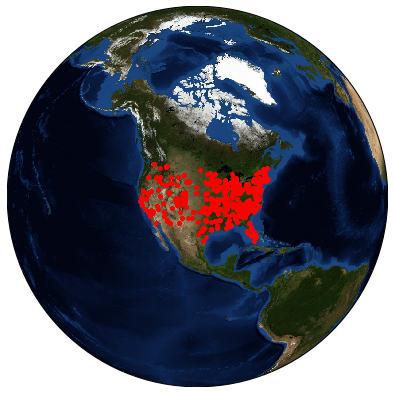

In [16]:

plt.figure(figsize = (10,7))
lat = list(data['latitude'])
lon = list(data['longitude'])
m = Basemap(projection = 'ortho',resolution = None, lat_0 = 40,lon_0 = -100)
x,y = m(lon,lat)
m.bluemarble(scale = 0.5)
m.scatter(x, y, 10, marker='o', color = 'red', zorder=3,alpha = 0.4)

In [20]:
# Lets look deep into it
provinces = data['province'].unique()
fig = go.Figure(data = go.Choropleth(locations = provinces,z = data['province'].value_counts().values,text=data['province'].value_counts().index,locationmode = "USA-states",colorscale = 'viridis', colorbar_title = "Total No. of hotel reviews"))

fig.update_layout(title_text = 'Total Number of Hotel reviews in Each Provinces',geo_scope = 'usa')
fig.show()

####  Lets see the above data in a count plot

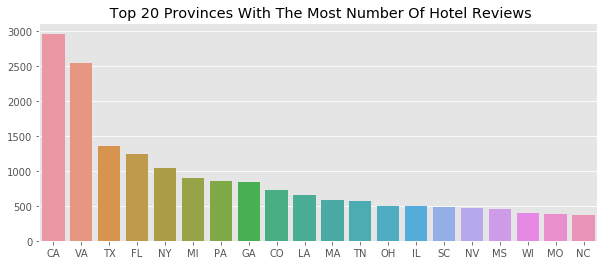

In [18]:
plt.figure(figsize = (10,4))
plt.style.use('ggplot')
plt.title(' Top 20 Provinces With The Most Number Of Hotel Reviews')
sns.barplot(data['province'].value_counts(ascending = False).head(20).index,data['province'].value_counts(ascending = False).head(20).values)

#### - From the observations above, we can see that California had the most number of reviews compare to all other provinces. Let's see the top 10 hotels in California

In [19]:
ca_hotels = pd.DataFrame(data[data['province'] == 'CA']['name'].value_counts().values, index = data[data['province'] == 'CA']['name'].value_counts().index,columns ={'Hotel'} )
ca_hotels.head(10)

Hotel
Best Western of Long Beach                317
Anaheim Marriott Suites                   275
Hotel Valencia Santana Row                197
Sportsmen's Lodge                         155
Holiday Inn Express San Clemente          150
Travelodge Anaheim Convention Center      141
Gardena Terrace Inn                       131
Simpson House Inn                         126
Best Western Plus San Marcos Inn          120
Quality Inn and Suites Irvine Spectrum    119

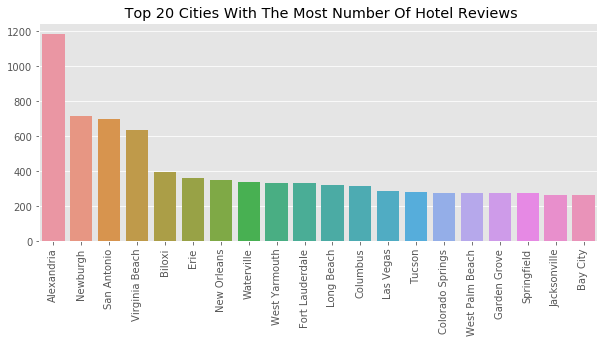

In [20]:
plt.figure(figsize = (10,4))
plt.style.use('ggplot')
plt.title(' Top 20 Cities With The Most Number Of Hotel Reviews')
plt.xticks(rotation = 90)
sns.barplot(data['city'].value_counts(ascending = False).head(20).index,data['city'].value_counts(ascending = False).head(20).values)

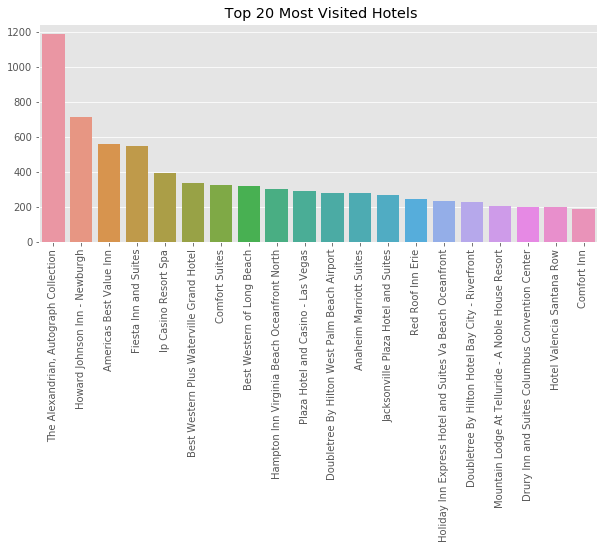

In [21]:
# Let's Most Frequently Appeared Hotel Names
plt.figure(figsize = (10,4))
plt.style.use('ggplot')
plt.title(' Top 20 Most Visited Hotels')
plt.xticks(rotation = 90)
sns.barplot(data['name'].value_counts(ascending = False).head(20).index,data['name'].value_counts(ascending = False).head(20).values)

#### - From the observation of  above, we can catch out that although California had the most number of hotel reviews, not so many of it's cities were in top 20 cities with the most hotel reviews. It had less hotel reviews than VA(2nd) or TX(3rd). 

In [21]:
data[data['province'] == 'CA']['city'].isin(data['city'].value_counts(ascending = False).head(20).index).value_counts()
print(" CA has {} hotel reviews ".format(data[data['province'] == 'CA']['city'].isin(data['city'].value_counts(ascending = False).head(20).index).value_counts().values[1]))

 CA has 592 hotel reviews 


In [22]:
data[data['province'] == 'VA']['city'].isin(data['city'].value_counts(ascending = False).head(20).index).value_counts()
print(" VA has {} hotel reviews ".format(data[data['province'] == 'VA']['city'].isin(data['city'].value_counts(ascending = False).head(20).index).value_counts().values[0]))

 VA has 1902 hotel reviews 


In [23]:
data[data['province'] == 'TX']['city'].isin(data['city'].value_counts(ascending = False).head(20).index).value_counts()
print(" TX has {} hotel reviews ".format(data[data['province'] == 'TX']['city'].isin(data['city'].value_counts(ascending = False).head(20).index).value_counts().values[0]))

 TX has 696 hotel reviews 


#### - How about their ratings ?

In [24]:
# Grouping by the province and city
province_rating = data.groupby('province')['reviews.rating'].mean().reset_index().head(20)
province_rating = province_rating.sort_values('reviews.rating',ascending = False)
city_rating = data.groupby('city')['reviews.rating'].mean().reset_index().head(20)
city_rating = city_rating.sort_values('reviews.rating',ascending = False)

data_group_hotels = data.groupby('name')['reviews.rating'].mean()
data_group_hotels = data_group_hotels.sort_values(ascending=False)

Text(0.5, 1.0, 'Top 20 Hotels By Ratings in Average')

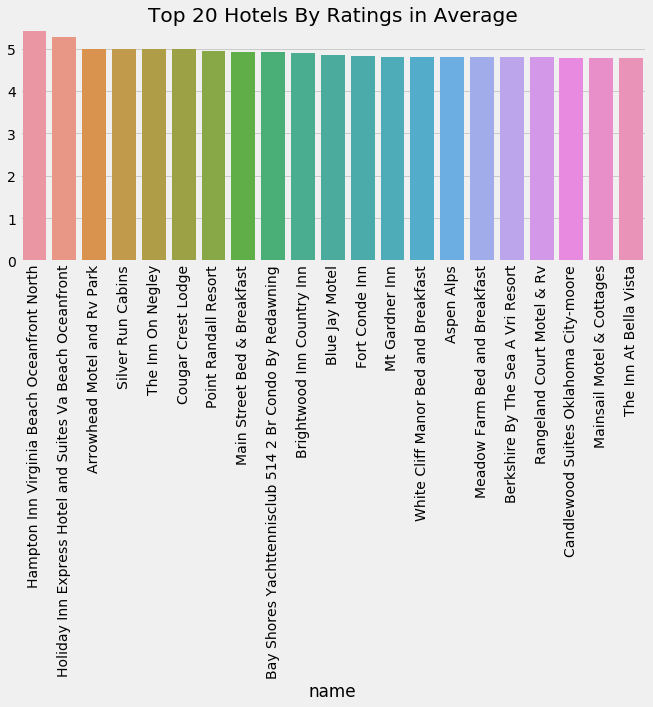

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,4))
plt.xticks(rotation =90)
plt.ylim(0,5.5)
sns.barplot(data_group_hotels.index[0:21],data_group_hotels.values[0:21]).set_title('Top 20 Hotels By Ratings in Average')

Text(0.5, 1.0, 'Top 15 Provinces with the Highest Average Ratings')

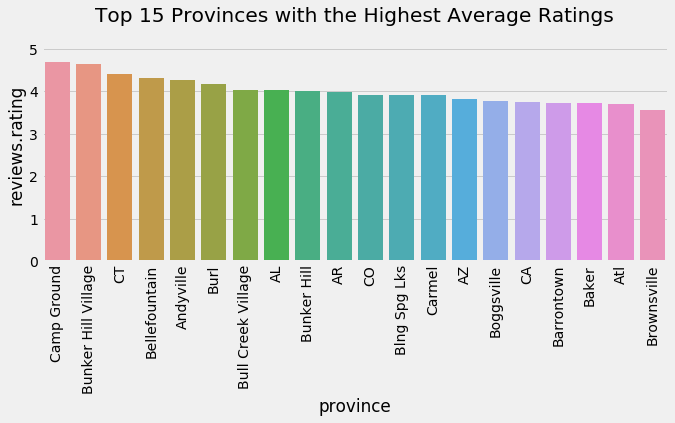

In [28]:
# province with highest ratings

plt.figure(figsize = (10,4))
plt.xticks(rotation =90)
plt.ylim(0,5.5)
sns.barplot(province_rating['province'], province_rating['reviews.rating']).set_title('Top 15 Provinces with the Highest Average Ratings')

Text(0.5, 1.0, 'Top 15 Cities with the Highest Average Ratings')

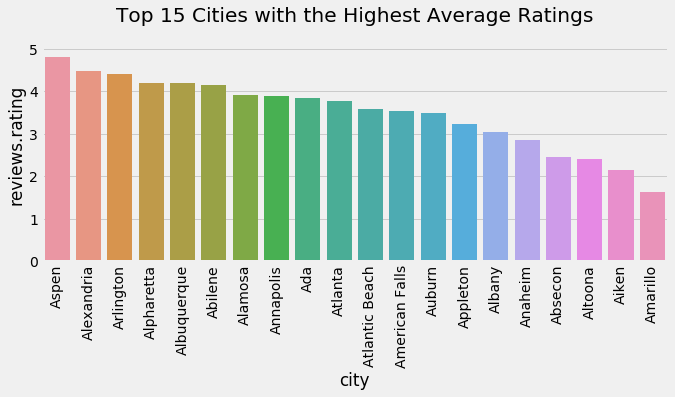

In [29]:
# city with highest ratings
plt.figure(figsize = (10,4))
plt.xticks(rotation =90)
plt.ylim(0,5.5)
sns.barplot(city_rating['city'], city_rating['reviews.rating']).set_title('Top 15 Cities with the Highest Average Ratings')

In [30]:
top20_ratings_list = data_group_hotels.head(20).index
print(data[data['province'] == 'CA']['name'].isin(top20_ratings_list).value_counts())

print(' CA has no hotels  which ranks top 20 in Average ratings')

False    2964
Name: name, dtype: int64
 CA has no hotels  which ranks top 20 in Average ratings


In [31]:
data[data['province'] == 'VA']['name'].isin(top20_ratings_list).value_counts()
print(' VA has 530 reviews of hotels which ranks top 20 in Average ratings')

 VA has 530 reviews of hotels which ranks top 20 in Average ratings


In [32]:
hotel_counts = data.groupby('name')['reviews.rating'].count()
hotel_ratings = data.groupby('name')['reviews.rating'].mean()
print("The correlation between number of hotel reviews and average ratings is {} ".format(hotel_ratings.corr(hotel_counts)))

The correlation between number of hotel reviews and average ratings is -0.02928486133594785 


#### - From these observations, we can state that the high number of hotel reviews does not mean that it will have higher ratings.

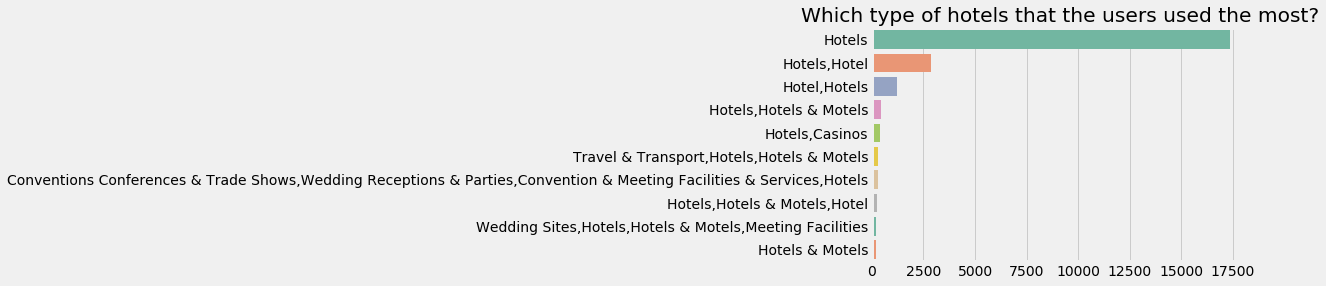

In [33]:
plt.title('Which type of hotels that the users used the most?')
sns.barplot(data['categories'].value_counts().head(10).values,data['categories'].value_counts().head(10).index,palette='Set2')

### - Distribution of ratings on Top 5 provinces with the highest ratings

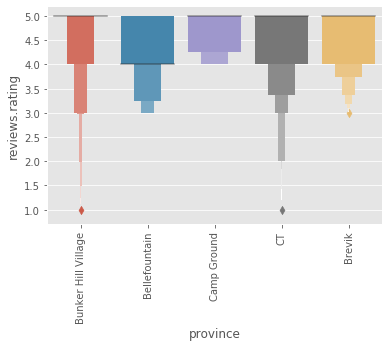

In [30]:

province_top5 = data.loc[(data['province'].isin(province_rating['province'].values[0:5]))] 
plt.xticks(rotation = 90)
sns.boxenplot(province_top5['province'], province_top5['reviews.rating'])

### - Distribution of ratings on Top 5 cities with the highest ratings

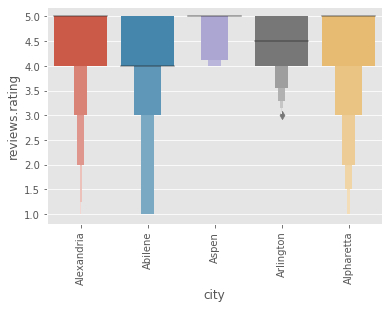

In [31]:

city_top5 = data.loc[(data['city'].isin(city_rating['city'].values[0:5]))] 
plt.xticks(rotation = 90)
sns.boxenplot(city_top5['city'], city_top5['reviews.rating'])

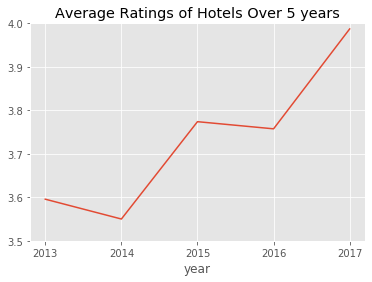

In [41]:
data['reviews.date'] = pd.to_datetime(data['reviews.date'])
data['year'] = data['reviews.date'].dt.year
data_group_year = data.groupby('year')['reviews.rating'].mean()
g = sns.lineplot(data_group_year.index[11:],data_group_year.values[11:])
plt.ylim(3.5,4)
plt.title('Average Ratings of Hotels Over 5 years')
g.set_xticks([2013,2014,2015,2016,2017])

In [40]:
data_group_year = data.groupby('year')['reviews.rating'].mean()
data_group_year


year
2002    4.666667
2003    4.250000
2004    4.400000
2005    3.400000
2006    3.833333
2007    3.609756
2008    4.045930
2009    4.185484
2010    3.736996
2011    3.757041
2012    3.668470
2013    3.595663
2014    3.550078
2015    3.773919
2016    3.757475
2017    3.987179
Name: reviews.rating, dtype: float64

#### - The Average ratings had increased over the 5 years by around 0.4 in average.

### - Rating distribution from 2013 to 2017

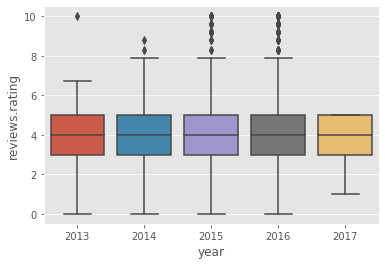

In [35]:

data_5years = data.loc[(data['year'].isin([2013,2014,2015,2016,2017]))]
sns.boxplot(x = data_5years['year'],y = data_5years['reviews.rating'] )

#### - From the distribution graph, we can point out the over that five years, the interquartile range had stayed constantly.

### - I will consider hotels with more than 4 ratings score as 'Good' hotels and below 4 as 'Bad' hotels. Here are the wordclouds to describe the hotels according to their categories

In [35]:
# Wordcloud on Good ratings and bad ratings
data_goodrat = data[data['reviews.rating'] >= 4.0]
data_badrat = data[data['reviews.rating'] < 4.0]

wordcloud_good = WordCloud(width = 500,height = 500,background_color = 'black',stopwords=set(STOPWORDS)).generate(" ".join(data_goodrat['reviews.title'].values))
wordcloud_bad = WordCloud(width = 500,height = 500,background_color = 'black',stopwords=set(STOPWORDS)).generate(" ".join(data_badrat['reviews.title'].values))


#### - Wordcloud of Nicely Rated Hotels

(-0.5, 499.5, 499.5, -0.5)

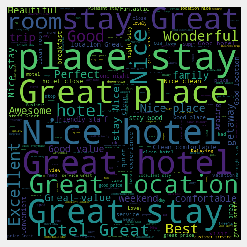

In [36]:
plt.imshow(wordcloud_good)
plt.axis('off')


#### - Wordcloud of Badly Rated Hotels

(-0.5, 499.5, 499.5, -0.5)

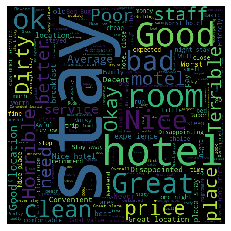

In [44]:
plt.imshow(wordcloud_bad)
plt.axis('off')

### Review Texts and Title Length Histrogram

In [39]:

data['text_len'] = data['reviews.text'].apply(lambda x : len(x))
data['title_len'] = data['reviews.title'].apply(lambda x : len(x))

fig = px.histogram(data, 'text_len')
fig.update_layout(title = 'Frequency of Text Length')
fig.show()

In [41]:
fig2 = px.histogram(data, 'title_len')
fig2.update_layout(title = 'Frequency of Title Length')
fig2.show()

Text(0.5, 1.0, 'Distribution of Title Length of each Review Ratings')

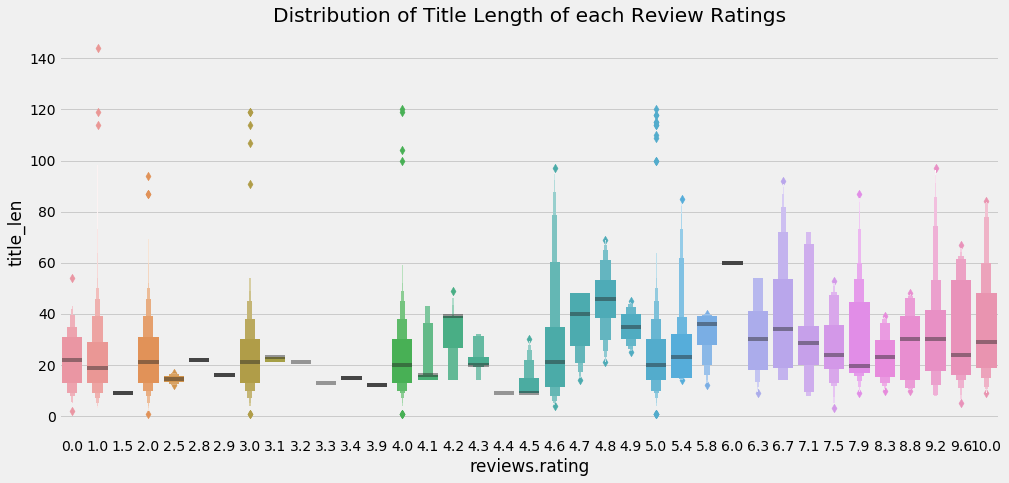

In [42]:
plt.figure(figsize = (15,7))
sns.boxenplot(data['reviews.rating'],data['title_len']).set_title('Distribution of Title Length of each Review Ratings')


Text(0.5, 1.0, 'Distribution of Text Length of each Review Ratings')

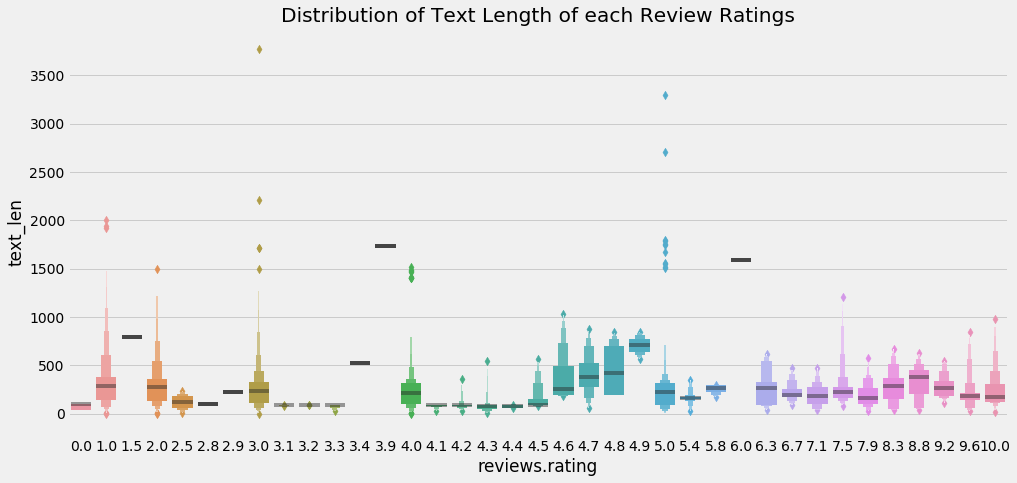

In [43]:
plt.figure(figsize = (15,7))
sns.boxenplot(data['reviews.rating'],data['text_len']).set_title('Distribution of Text Length of each Review Ratings')


#### - From these graphs, we can see that there were longer text/title length distributions in the 'Nicely Rated Hotels' group than the other.

# Sentimental Analysis

#### - I will separate into two groups according to their review ratings : 0(bad) and 1(good)

In [48]:

def sentimental_analyzer(data):
    if( data < 4.0 ) :
        return 0
    else :
        return 1

Text(0.5, 1.0, 'Distribution of Review Ratings')

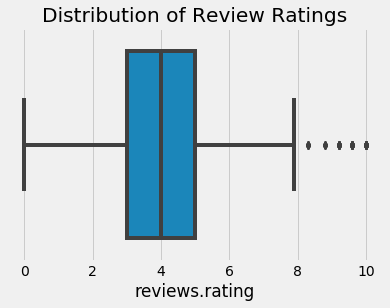

In [49]:
sns.boxplot(data['reviews.rating']).set_title('Distribution of Review Ratings')

#### - There are some outliers above ratings of 8. Therfore, in order to have more accurate predictions, I will also remove the outliers.

In [50]:
data = data[(data['reviews.rating'] <=8.0) & (data['reviews.rating'] >=0.0)]

In [51]:
data['target'] = data['reviews.rating'].apply(lambda x: sentimental_analyzer(x))

C:\Users\andyj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
data['target'].value_counts()

1    18524
0    10235
Name: target, dtype: int64

### - Text Preprocessing by stemming and removing the punctuations

In [53]:
# Stemming
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def text_preprocessing(strings):
    ps = PorterStemmer()
    words = word_tokenize(strings)
    res = []
    for i in words:
        if(i in string.punctuation):
            res.append("")
        else:
            
            res.append(ps.stem(i))
            res.append (" ") 
    return "".join(res)

data['reviews.text'] = data['reviews.text'].apply(text_preprocessing)
data['reviews.text']

C:\Users\andyj\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



60       We had a wonder relax time the staff were comp...
61       We were in palm spring on the day the temperat...
62       We arriv in palm spring not sure what to expec...
63       thi place realli is a littl paradis A beauti b...
64       spent 3 night at littl paradis boutiqu hotel o...
                               ...                        
35905    We truli enjoy stay at the elk spring resort I...
35906    We were here for a 2nd time the last weekend o...
35907    best of the best My famili and I stay in the g...
35908    amaz vacat in beauti cabin We stay for a long ...
35909    My husband and I stay at tree top which is in ...
Name: reviews.text, Length: 28759, dtype: object

### - Converting the texts to vectors.

In [54]:
# Vectorize the text
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df = 3, max_features = None, strip_accents = 'unicode',analyzer = 'word',ngram_range = (1,3),stop_words = 'english')

In [55]:
vectorized_text = tfv.fit_transform(data['reviews.text'])

In [56]:
X = vectorized_text
y = data['target']

### - Getting the train and test sets.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [58]:
X_train

<20131x62901 sparse matrix of type '<class 'numpy.float64'>'
	with 798941 stored elements in Compressed Sparse Row format>

## - Classifying Models( MultionomialNB, Logistic Regression and SVM)

In [59]:
from sklearn.naive_bayes import MultinomialNB
nbclf = MultinomialNB()
nbclf.fit(X_train,y_train)
pred_nb = nbclf.predict(X_test)
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      3195
           1       0.79      0.95      0.86      5433

    accuracy                           0.81      8628
   macro avg       0.83      0.76      0.78      8628
weighted avg       0.82      0.81      0.80      8628



Text(0.5, 1, 'Confusion Matrix of Multinomial NB')

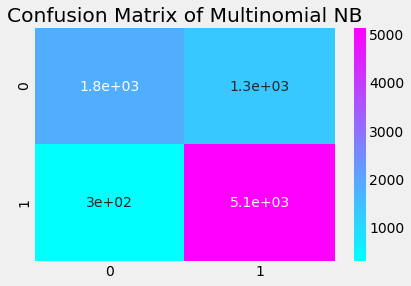

In [60]:
sns.heatmap(confusion_matrix(y_test,pred_nb),cmap='cool',annot = True).set_title('Confusion Matrix of Multinomial NB')

In [61]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter = 100,C = 1)
logistic.fit(X_train,y_train)
pred_i = logistic.predict(X_test)
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.83      0.68      0.74      3195
           1       0.83      0.92      0.87      5433

    accuracy                           0.83      8628
   macro avg       0.83      0.80      0.81      8628
weighted avg       0.83      0.83      0.82      8628



Text(0.5, 1, 'Confusion_matrix of Logistic Regression')

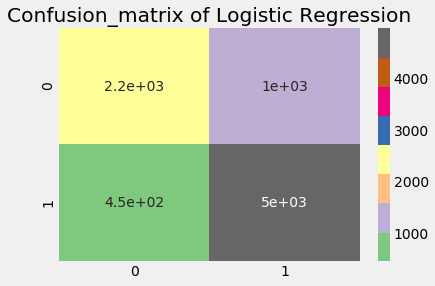

In [62]:
sns.heatmap(confusion_matrix(y_test,pred_i),cmap='Accent',annot = True).set_title('Confusion_matrix of Logistic Regression')

In [67]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C = 10,gamma = 10)
svm.fit(X_train,y_train)
pred_s = svm.predict(X_test)
print(classification_report(y_test,pred_s))

              precision    recall  f1-score   support

           0       0.68      0.06      0.11      3195
           1       0.64      0.98      0.78      5433

    accuracy                           0.64      8628
   macro avg       0.66      0.52      0.44      8628
weighted avg       0.65      0.64      0.53      8628



Text(0.5, 1, 'Confusion_matrix of SVM')

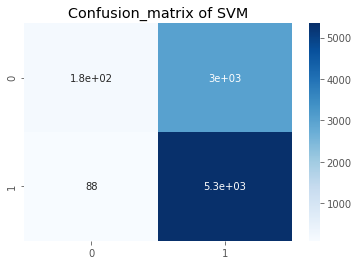

In [70]:
sns.heatmap(confusion_matrix(y_test,pred_s),cmap='Blues',annot = True).set_title('Confusion_matrix of SVM')

### - Logistic Regression has the highest accuracy among the other classifier models. Let's Test the model 

- I will use some sentences with the words in the previous wordclouds

In [63]:
# Good
print(logistic.predict(tfv.transform(['It was a great hotel with excellent location!'])))
                                      
# Bad
print(logistic.predict(tfv.transform(['It was a ok hotel. They had poor service and bit dirty rooms. But overall, it was ok'])))

[1]
[0]


#### - Great! It correctly classified the text.

# Recommender System

### - There are two main types of Recommendation Systems : Collaborative-Filtering and Content-Based.

- I have used KNearestNeighbors to find the most similar text compare to a certain text. By using cosine similarity, I can measure the similarity distance(How closely they are related) between the texts.

- I also used sigmoid kernels to compare two text vectors to get their similarity probabilities. By using these values, I can get a list of similar hotels.

## - Collaborative-Filtering Recommder System

In [64]:
data_recsys = data[['name','reviews.username','reviews.rating']]

In [65]:
data_recsys

name reviews.username  reviews.rating
60     Little Paradise Hotel            Flo H             5.0
61     Little Paradise Hotel          Julie R             5.0
62     Little Paradise Hotel         martin n             5.0
63     Little Paradise Hotel     shetravels66             5.0
64     Little Paradise Hotel     Mary Ellen R             5.0
...                      ...              ...             ...
35905     Elk Springs Resort  randolphtiffany             5.0
35906     Elk Springs Resort        Sabrina P             5.0
35907     Elk Springs Resort        Chelsa K.             5.0
35908     Elk Springs Resort       Heather D.             5.0
35909     Elk Springs Resort         Carol W.             5.0

[28759 rows x 3 columns]

#### - Making a pivot table

In [66]:
data_piv = data_recsys.pivot_table(index = 'name', values = 'reviews.rating', columns = 'reviews.username').fillna(0)

In [67]:
data_piv

reviews.username                               'Kim L  000guest2016  \
name                                                                  
1785 Inn                                          0.0           0.0   
1900 House                                        0.0           0.0   
40 Berkeley Hostel                                0.0           0.0   
A Bed & Breakfast In Cambridge                    0.0           0.0   
Ambassadors Inn and Suites                        0.0           0.0   
...                                               ...           ...   
Wingate By Wyndham Chantilly / Dulles Airport     0.0           0.0   
Wingate By Wyndham Lagrange                       0.0           0.0   
Wingate By Wyndham Pueblo                         0.0           0.0   
Wyndham Resort At Fairfield Mountains             0.0           0.0   
Wyndham Vacation Resorts Towers On The Grove      0.0           0.0   

reviews.username                               0704couple  0MLB  0gerganam  \
name                                                                         
1785 Inn                                              0.0   0.0        0.0   
1900 House                                            0.0   0.0        0.0   
40 Berkeley Hostel                                    0.0   0.0        0.0   
A Bed & Breakfast In Cambridge                        0.0   0.0        0.0   
Ambassadors Inn and Suites                            0.0   0.0        0.0   
...                                                   ...   ...        ...   
Wingate By Wyndham Chantilly / Dulles Airport         0.0   0.0        0.0   
Wingate By Wyndham Lagrange                           0.0   0.0        0.0   
Wingate By Wyndham Pueblo                             0.0   0.0        0.0   
Wyndham Resort At Fairfield Mountains                 0.0   0.0        0.0   
Wyndham Vacation Resorts Towers On The Grove          0.0   0.0        0.0   

reviews.username                               100virginiaw  10197701  \
name                                                                    
1785 Inn                                                0.0       0.0   
1900 House                                              0.0       0.0   
40 Berkeley Hostel                                      0.0       0.0   
A Bed & Breakfast In Cambridge                          0.0       0.0   
Ambassadors Inn and Suites                              0.0       0.0   
...                                                     ...       ...   
Wingate By Wyndham Chantilly / Dulles Airport           0.0       0.0   
Wingate By Wyndham Lagrange                             0.0       0.0   
Wingate By Wyndham Pueblo                               0.0       0.0   
Wyndham Resort At Fairfield Mountains                   0.0       0.0   
Wyndham Vacation Resorts Towers On The Grove            0.0       0.0   

reviews.username                               101andya  1021complete  \
name                                                                    
1785 Inn                                            0.0           0.0   
1900 House                                          0.0           0.0   
40 Berkeley Hostel                                  0.0           0.0   
A Bed & Breakfast In Cambridge                      0.0           0.0   
Ambassadors Inn and Suites                          0.0           0.0   
...                                                 ...           ...   
Wingate By Wyndham Chantilly / Dulles Airport       0.0           0.0   
Wingate By Wyndham Lagrange                         0.0           0.0   
Wingate By Wyndham Pueblo                           0.0           0.0   
Wyndham Resort At Fairfield Mountains               0.0           0.0   
Wyndham Vacation Resorts Towers On The Grove        0.0           0.0   

reviews.username                               103jeremiahw  ...  zumaqueen  \
name                                                         ...              
178

### - Converting the pivot table into sparse matrix

In [68]:
from scipy.sparse import csr_matrix
matrix = csr_matrix(data_piv)

### - Using the cosin similarities to find similar list of hotels

In [101]:
from sklearn.neighbors import NearestNeighbors

In [102]:
knn = NearestNeighbors(metric = 'cosine',algorithm = 'brute')  # Using Brute Force Search Algorithm

In [103]:
knn.fit(matrix)
matrix.shape

(407, 12410)

### - Since the recommender system model is ready, let's pick a hotel from the data and observe it's similar hotels

In [104]:
# Let's see the recommender system
random_data = 123

In [105]:
distances,indices = knn.kneighbors(data_piv.iloc[random_data,:].values.reshape(1,-1),n_neighbors = 6)

In [106]:
def recommending(data_piv,random_data,distances,indices):
    print("Recommending Hotels Similar to : {}\n".format(data_piv.index[random_data]))
    for i in range(1,len(distances.flatten())):
        print("{}. Name : {} , Distance of : {} ".format(i,data_piv.index[indices.flatten()[i]], distances.flatten()[i]))

In [107]:
recommending(data_piv,random_data,distances,indices)

Recommending Hotels Similar to : Doubletree By Hilton Hotel Bay City - Riverfront

1. Name : Days Inn Branson / Near The Strip , Distance of : 0.927825750231793 
2. Name : Howard Johnson Inn Columbia , Distance of : 0.9336440072104835 
3. Name : Courtyard By Marriott Downtown Boise , Distance of : 0.9368780246757727 
4. Name : Fairfield Inn By Marriott Binghamton , Distance of : 0.9381335286170157 
5. Name : Holiday Inn Express Hotel and Suites Meadowlands Area , Distance of : 0.9443548962180834 


In [108]:
data[data['name'] == data_piv.index[indices.flatten()[2]]]['reviews.rating'].shape

(81,)

### - Evaluation on the Recommender System

In [109]:
# Let's see whether the recommendation was accurate
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("The RMSE Between '{}' and '{}' is : {}".format(data_piv.index[random_data],data_piv.index[indices.flatten()[5]],np.sqrt(mean_squared_error(data[data['name'] == data_piv.index[random_data]].sample(n=70)['reviews.rating'],data[data['name'] == data_piv.index[indices.flatten()[5]]].sample(n=70)['reviews.rating']))))

The RMSE Between 'Doubletree By Hilton Hotel Bay City - Riverfront' and 'Holiday Inn Express Hotel and Suites Meadowlands Area' is : 1.3201731488169053


# Recommendation System With Content Based

### - Combining all the related text columns into one description column

In [110]:

data['description'] = data[['address', 'city', 'name','province','reviews.text','reviews.title']].apply(
    lambda x: ' '.join(x.fillna('').astype(str)),axis=1)



C:\Users\andyj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
data_group = data.groupby('name')['description'].apply(lambda x: x.sum()).reset_index()
data_group = pd.DataFrame(data_group)
data_group

name  \
0                                         1785 Inn   
1                                       1900 House   
2                               40 Berkeley Hostel   
3                   A Bed & Breakfast In Cambridge   
4                       Ambassadors Inn and Suites   
..                                             ...   
402  Wingate By Wyndham Chantilly / Dulles Airport   
403                    Wingate By Wyndham Lagrange   
404                      Wingate By Wyndham Pueblo   
405          Wyndham Resort At Fairfield Mountains   
406   Wyndham Vacation Resorts Towers On The Grove   

                                           description  
0    3582 White Mountain Hwy North Conway 1785 Inn ...  
1    59 Kingstown Rd Narragansett 1900 House Galile...  
2    40 Berkeley St Boston 40 Berkeley Hostel MA We...  
3    1657 Cambridge St Cambridge A Bed & Breakfast ...  
4    716 21st St Virginia Beach Ambassadors Inn and...  
..                                                 ...  
402  3940 Centerview Dr Chantilly Wingate By Wyndha...  
403  103 Wingate Ter Lagrange Wingate By Wyndham La...  
404  4711 N Elizabeth Pueblo Wingate By Wyndham Pue...  
405  747 Buffalo Creek Rd Lake Lure Wyndham Resort ...  
406  2100 N Ocean Blvd North Myrtle Beach Wyndham V...  

[407 rows x 2 columns]

### - Vectorizing the description

In [112]:

tfv = TfidfVectorizer(min_df = 3, max_features = None, strip_accents = 'unicode',analyzer = 'word',ngram_range = (1,4),stop_words = 'english')

In [113]:
data_tfv = tfv.fit_transform(data_group['description'])

In [114]:
data_tfv.shape

(407, 63959)

### - By using sigmoid kernel, I compare the text vectors to each other and receive a relativity probabilities between those two.

In [115]:
from sklearn.metrics.pairwise import sigmoid_kernel  # Changing values from 0 to 1
sig= sigmoid_kernel(data_tfv,data_tfv)

In [116]:
sig

array([[0.76160072, 0.7615944 , 0.7615943 , ..., 0.76159433, 0.76159444,
        0.76159455],
       [0.7615944 , 0.76160072, 0.76159432, ..., 0.76159437, 0.76159446,
        0.76159439],
       [0.7615943 , 0.76159432, 0.76160072, ..., 0.76159442, 0.76159425,
        0.76159429],
       ...,
       [0.76159433, 0.76159437, 0.76159442, ..., 0.76160072, 0.76159527,
        0.76159498],
       [0.76159444, 0.76159446, 0.76159425, ..., 0.76159527, 0.76160072,
        0.76159517],
       [0.76159455, 0.76159439, 0.76159429, ..., 0.76159498, 0.76159517,
        0.76160072]])

In [117]:
indices = pd.Series(data_group.index, index = data_group['name']).drop_duplicates()

#### - Making a pipeline of Content-Based Recommender System

In [118]:
def recommendation_content(title,sig=sig):
    idx = indices[title]
    recsys = list(enumerate(sig[idx]))
    recsys = sorted(recsys,key = lambda x:x[1],reverse =True)
    # Shows top 10 recommendations
    recsys = recsys[1:11]
    
    # Top 10 indices
    similarity_score = [i[0] for i in recsys]
    
    return data_group['name'].iloc[similarity_score]

### - Testing the Content-Based Recommender System

In [119]:
# random testing

random_hotel = data.iloc[354]['name']
print("The random hotel's name is : {} ".format(random_hotel))

The random hotel's name is : Best Western Plus Waterville Grand Hotel 


### - Top 10 Most Similar Hotels List

In [120]:
pd.DataFrame(recommendation_content(random_hotel).values,index=recommendation_content(random_hotel).index,columns={'Hotel Name'}).reset_index().drop('index',axis = 1)

Hotel Name
0                       Best Western Plus Circle Inn
1                   Best Western Plus San Marcos Inn
2  Best Western Plus Arlington North Hotel and Su...
3                        Best Western Plus Kelly Inn
4    Best Western Plus French Quarter Landmark Hotel
5          Best Western Hospitality Hotel and Suites
6                           Best Western Eufaula Inn
7                                        Antlers Inn
8                   Best Western Owasso Inn & Suites
9  Hampton Inn Grand Junction Downtown/historic M...

### - WordCloud of the random hotel selected and some of it's similar hotel

#### - To examine the recommender system, I will use the wordclouds to see whether they have similar words that describe them.

In [121]:
# Randomly choose 3 hotels in the top 10 recommendations
ran_num = np.random.randint(0,10,size=(1,3)).flatten()

In [122]:
def generate_wordcloud(i):
    wordcloud = WordCloud(width = 1000, height = 1000,background_color = 'black',stopwords=set(STOPWORDS)).generate(str(data_group[data_group['name'] == recommendation_content(random_hotel).values[i]]['description'].values))
    return wordcloud

['Best Western Owasso Inn & Suites']


(-0.5, 999.5, 999.5, -0.5)

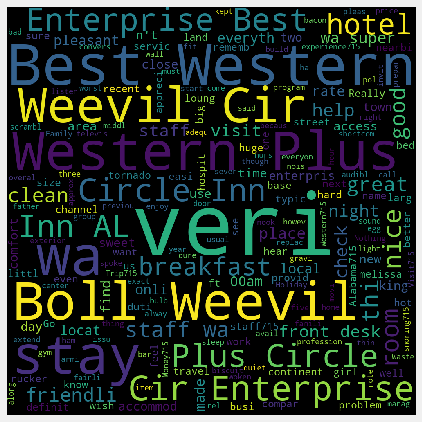

In [123]:
# Let's compare random 3 places with the selected hotel
wordcloud = generate_wordcloud(0)
plt.figure(figsize = (10,7))
print(str(data_group[data_group['name'] == recommendation_content(random_hotel).values[ran_num[0]]]['name'].values))
plt.imshow(wordcloud)
plt.axis('off')
    

['Holiday Inn Express & Suites Bay City']


(-0.5, 999.5, 999.5, -0.5)

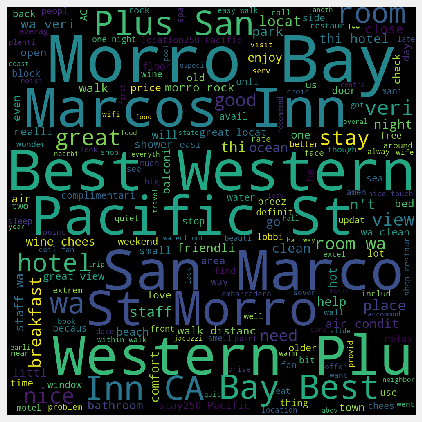

In [124]:
wordcloud = generate_wordcloud(1)
plt.figure(figsize = (10,7))
print(str(data_group[data_group['name'] == recommendation_content(random_data).values[ran_num[1]]]['name'].values))
plt.imshow(wordcloud)
plt.axis('off')

['Holiday Inn Express & Suites Bay City']


(-0.5, 999.5, 999.5, -0.5)

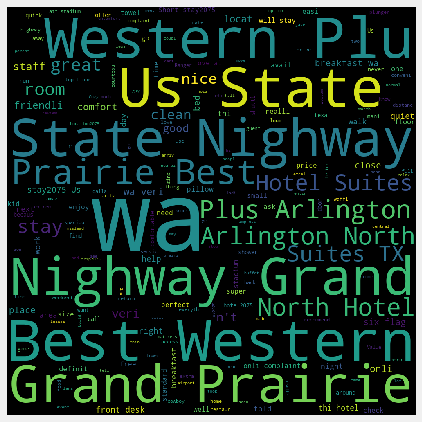

In [125]:
wordcloud = generate_wordcloud(2)
plt.figure(figsize = (10,7))
print(str(data_group[data_group['name'] == recommendation_content(random_data).values[ran_num[2]]]['name'].values))
plt.imshow(wordcloud)
plt.axis('off')

### Evaluating the Content-Based Recommender System

- Choose one hotel in the similar list and the random hotel, measure the RMSE of those two hotels.

In [135]:
print("The RMSE Between '{}' and '{}' is : {}".format(random_hotel,'Best Western Plus Circle Inn',np.sqrt(mean_squared_error(data[data['name'] == random_hotel].sample(n=30)['reviews.rating'],data[data['name'] == 'Holiday Inn Express & Suites Bay City'].sample(n=30)['reviews.rating']))))

The RMSE Between 'Best Western Plus Waterville Grand Hotel' and 'Best Western Plus Circle Inn' is : 1.4605934866804429


### As the result, they have common words such as 'Best','Western' or 'Prairie'.  It seems that the location and the description of the hotels had been the crucial points on finding their similarities . Also, it seems that the hotels were accurately recommended.